In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime

In [57]:
%matplotlib inline  
#%matplotlib qt5
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + '_BoB'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

# define savefig if we want to use if savefig 
savefig = 1


In [58]:
#specify the grid

#xmin, xmax = (-126,-121)
#ymin, ymax = (36.25,38.5)

In [59]:
file = '../Data/dataset-duacs-nrt(7:10:219).nc'
#directory = '../Data/*.nc'
#file = '../Data1/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1641856959851.nc'
#file = '../Data1/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1641857037190.nc'
#directory = '../Data1/*.nc'

In [60]:
ds = xr.open_dataset(file)
#ds = xr.open_mfdataset(directory)

In [61]:
ds

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 81, longitude: 80)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-10
  * latitude   (latitude) float32 5.125 5.375 5.625 5.875 ... 24.62 24.88 25.12
  * longitude  (longitude) float32 80.12 80.38 80.62 80.88 ... 99.38 99.62 99.88
Data variables:
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2021-07-13T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-07-12T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [83]:
longitude = ds.longitude
latitude = ds.latitude
ugos = ds.time,latitude,longitude
vgos = ds.time,latitude,longitude

In [92]:
#longitude = np.arange(-10, 10, 1)
#latitude = np.arange(-10, 10, 1)
longitude = np.meshgrid(longitude, sparse=True)
latitude = np.meshgrid(latitude, sparse=True)

u, v = np.meshgrid(ugos, vgos)

ValueError: X and Y must be the same size, but X.size is 80 and Y.size is 81.

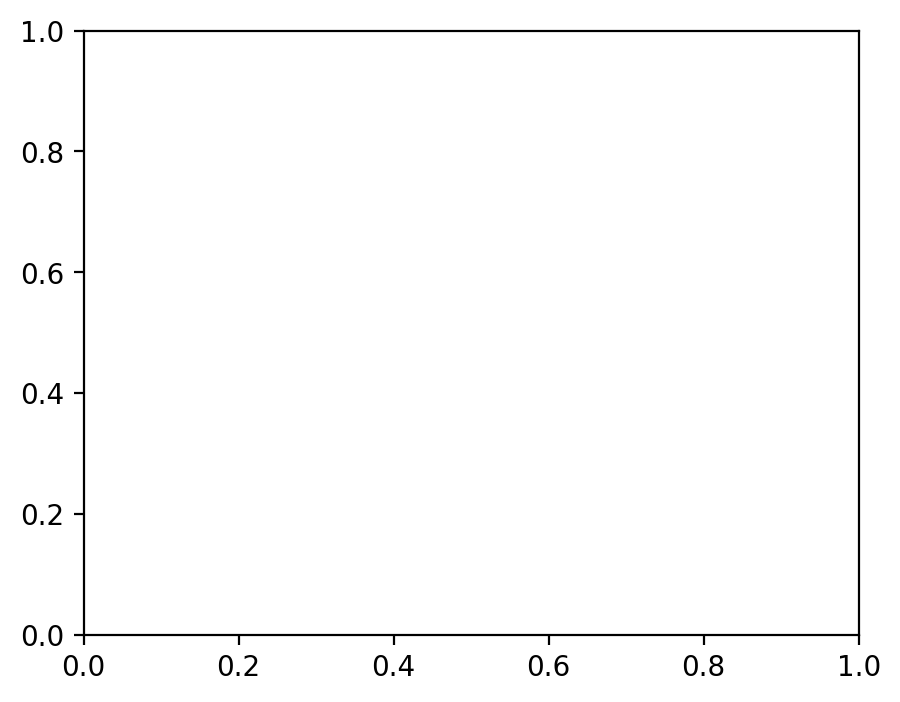

In [104]:
fig, ax1 = plt.subplots()
Q = ax1.quiver(longitude, latitude, u, v)


In [62]:
#timeindex = 0

sla = ds.sla

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_55264/3483492928.py:17: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


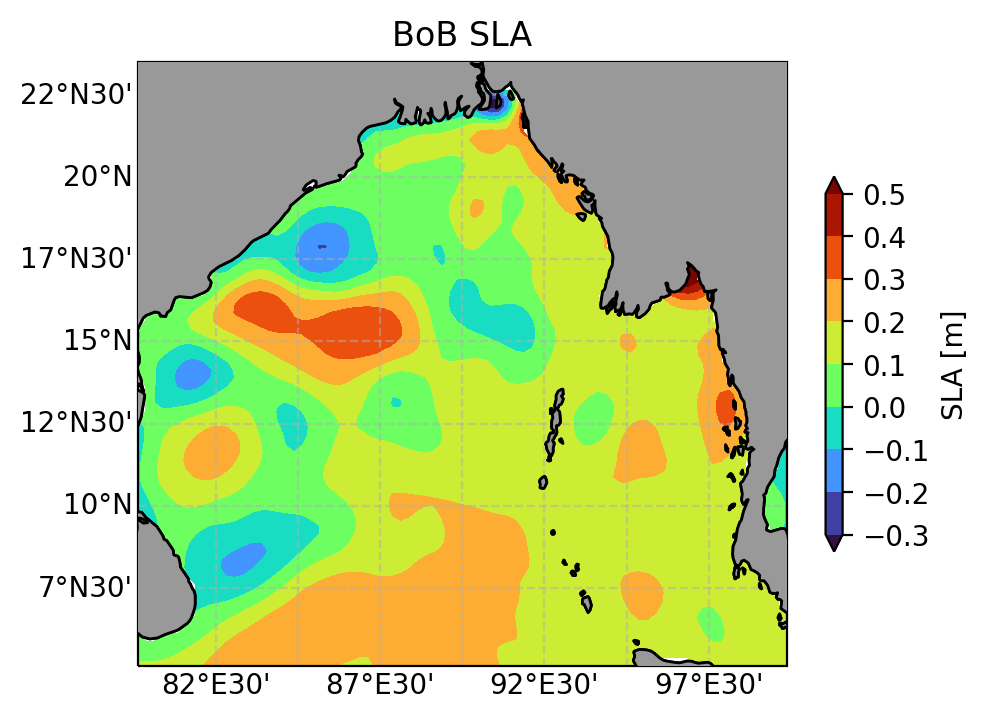

In [64]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB SLA')
#set the size of the axis
#extent = [xmin, xmax, ymin, ymax]
#ax.set_title('Sea level anomaly (DUACS)')

plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False

levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

if savefig:

    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)

In [ ]:
timeindex = 1

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_55264/1317662050.py:18: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


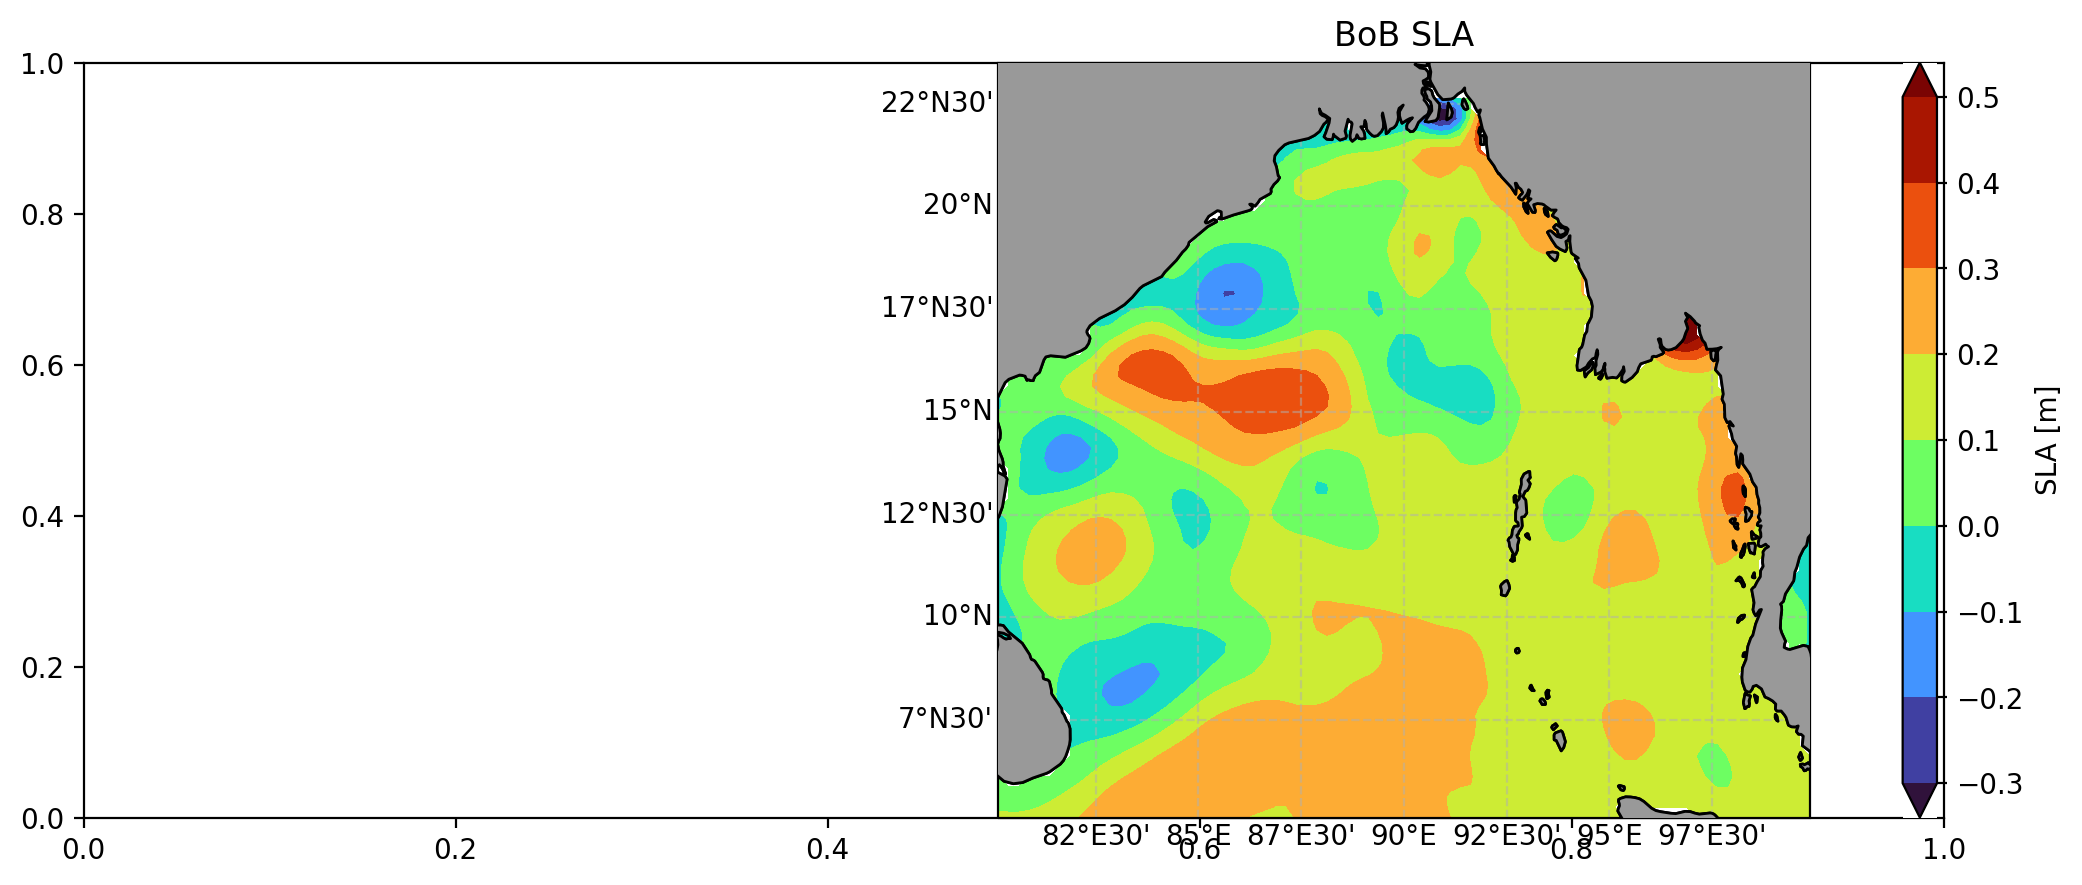

In [26]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB SLA')
#set the size of the axis
#extent = [xmin, xmax, ymin, ymax]
#ax.set_title('Sea level anomaly (DUACS)')

plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False

levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

if savefig:

    
    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)